In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
list_of_orders = pd.read_excel(r"C:\Users\Soft\Desktop\Py\Docs\AmazingMart.xlsx", sheet_name="ListOfOrders")
orders_breakdown = pd.read_excel(r"C:\Users\Soft\Desktop\Py\Docs\AmazingMart.xlsx", sheet_name="OrderBreakdown")

In [3]:
list_of_orders.sample(3)

,Order ID,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State,lon,lat
3248,AZ-2014-3031109,2014-06-17,Ashton Foley,Grenoble,France,Central,Consumer,2014-06-22,Economy,Auvergne-Rhône-Alpes,5.724524,45.188529
324,AZ-2011-4743912,2011-07-18,Cerys Edwards,Landerneau,France,Central,Consumer,2011-07-24,Economy,Brittany,-4.248437,48.450821
3206,AZ-2014-1805424,2014-06-09,Jodie Mellor,Rome,Italy,South,Consumer,2014-06-12,Priority,Lazio,12.496365,41.902783


In [4]:
orders_breakdown.sample(3)

,Order ID,Product Name,Discount,Sales,Profit,Quantity,Category,Sub-Category
280,BN-2011-1677989,"Panasonic Printer, Red",0.15,2017,0,9,Technology,Machines
1610,BN-2012-8351740,"Stiletto Box Cutter, Serrated",0.00,65,30,2,Office Supplies,Supplies
857,BN-2011-4861178,"SanDisk Keyboard, Programmable",0.50,332,-226,8,Technology,Accessories


In [5]:
df = pd.merge(list_of_orders, orders_breakdown)

In [6]:
df.head()

,Order ID,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State,lon,lat,Product Name,Discount,Sales,Profit,Quantity,Category,Sub-Category
0,BN-2011-7407039,2011-01-01,Ruby Patel,Stockholm,Sweden,North,Home Office,2011-01-05,Economy Plus,Stockholm,18.068581,59.329324,"Enermax Note Cards, Premium",0.5,45,-26,3,Office Supplies,Paper
1,AZ-2011-9050313,2011-01-03,Summer Hayward,Southport,United Kingdom,North,Consumer,2011-01-07,Economy,England,-3.010113,53.645708,"Dania Corner Shelving, Traditional",0.0,854,290,7,Furniture,Bookcases
2,AZ-2011-6674300,2011-01-04,Devin Huddleston,Valence,France,Central,Consumer,2011-01-08,Economy,Auvergne-Rhône-Alpes,4.892360,44.933393,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140,21,3,Office Supplies,Art
3,BN-2011-2819714,2011-01-04,Mary Parker,Birmingham,United Kingdom,North,Corporate,2011-01-09,Economy,England,-1.890401,52.486243,"Boston Markers, Easy-Erase",0.5,27,-22,2,Office Supplies,Art
4,BN-2011-2819714,2011-01-04,Mary Parker,Birmingham,United Kingdom,North,Corporate,2011-01-09,Economy,England,-1.890401,52.486243,"Eldon Folders, Single Width",0.5,17,-1,2,Office Supplies,Storage


In [9]:
date_sales = df[["Order Date", "Sales"]]
date_sales = date_sales.sort_values("Order Date")

In [14]:
date_sales["month_year"] = date_sales["Order Date"].dt.to_period("M")
date_sales

,Order Date,Sales,month_year
0,2011-01-01,45,2011-01
1,2011-01-03,854,2011-01
2,2011-01-04,140,2011-01
3,2011-01-04,27,2011-01
4,2011-01-04,17,2011-01
...,...,...,...
8041,2014-12-31,867,2014-12
8042,2014-12-31,289,2014-12
8043,2014-12-31,32,2014-12
8044,2014-12-31,30,2014-12


In [15]:
monthly_sales = date_sales.groupby("month_year")["Sales"].sum().reset_index()

In [21]:
monthly_sales["month_year"] = monthly_sales["month_year"].astype(str)

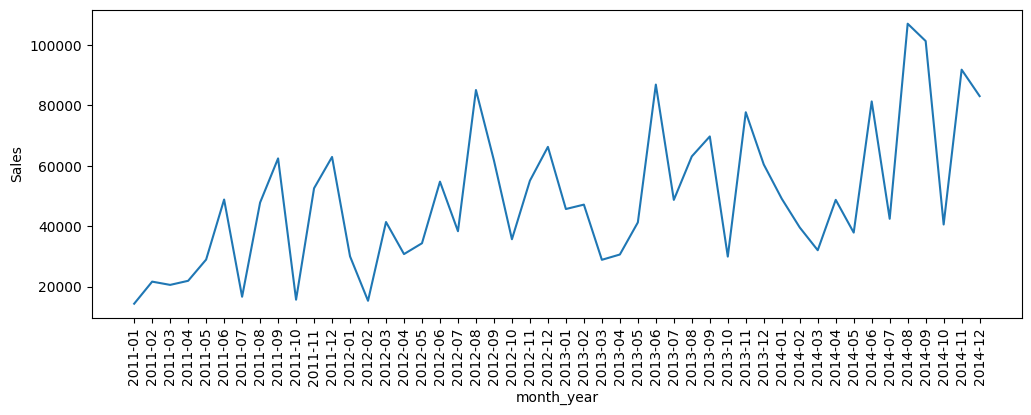

In [26]:
plt.figure(figsize=(12, 4))
sns.lineplot(monthly_sales, x="month_year", y="Sales")
plt.xticks(rotation=90)
plt.show()

In [28]:
df["Month"] = df["Order Date"].dt.month

In [29]:
df["Month"]

0        1
1        1
2        1
3        1
4        1
        ..
8042    12
8043    12
8044    12
8045    12
8046    12
Name: Month, Length: 8047, dtype: int32

In [31]:
month_category_sales_profit = df.groupby(["Month", "Category"])[["Sales", "Profit"]].mean().reset_index()

In [32]:
month_category_sales_profit

,Month,Category,Sales,Profit
0,1,Furniture,453.910448,24.298507
1,1,Office Supplies,181.301205,27.346386
2,1,Technology,647.373333,90.666667
3,2,Furniture,583.764706,42.852941
4,2,Office Supplies,151.199275,27.894928
5,2,Technology,469.533333,42.988889
6,3,Furniture,549.786885,-7.688525
7,3,Office Supplies,155.297806,28.178683
8,3,Technology,485.341463,53.780488
9,4,Furniture,534.315789,76.807018


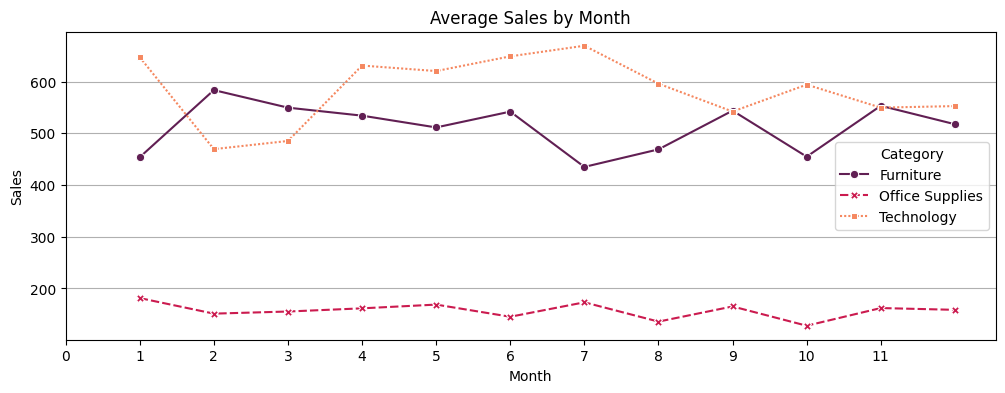

In [50]:
plt.figure(figsize=(12, 4))
sns.lineplot(month_category_sales_profit, x="Month", y="Sales", hue="Category", 
             style="Category", palette="rocket", markers=True)
plt.title("Average Sales by Month")
plt.grid(axis="y")
plt.xticks(range(0, 12))
plt.show()

In [54]:
sales_sub_category = df.groupby(["Category","Sub-Category"])["Sales"].sum().reset_index()

In [55]:
sales_sub_category

,Category,Sub-Category,Sales
0,Furniture,Bookcases,294396
1,Furniture,Chairs,186698
2,Furniture,Furnishings,68237
3,Furniture,Tables,89478
4,Office Supplies,Appliances,209900
5,Office Supplies,Art,127184
6,Office Supplies,Binders,78934
7,Office Supplies,Envelopes,31210
8,Office Supplies,Fasteners,16238
9,Office Supplies,Labels,12822


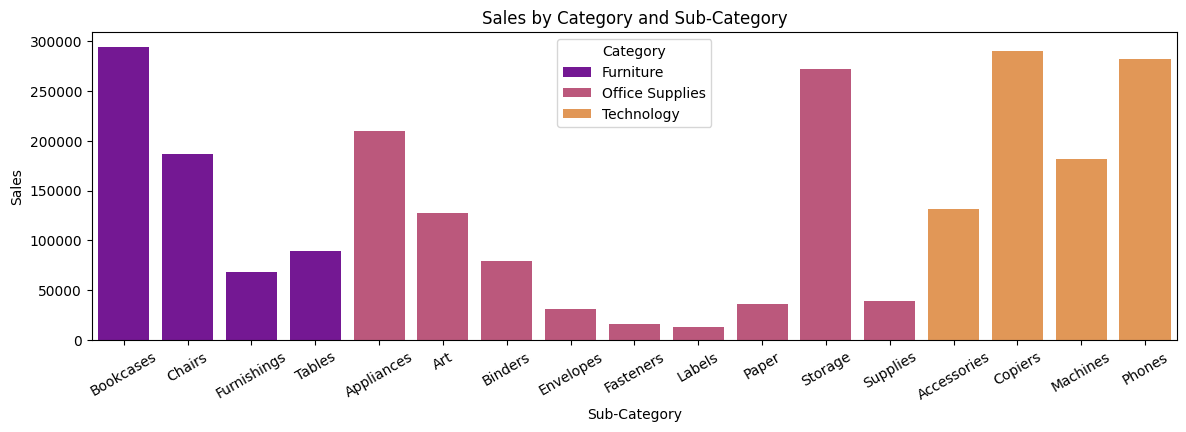

In [65]:
plt.figure(figsize=(14, 4))
sns.barplot(sales_sub_category, x="Sub-Category", y="Sales", hue="Category", palette="plasma")
plt.title("Sales by Category and Sub-Category")
plt.xticks(rotation=30)
plt.show()

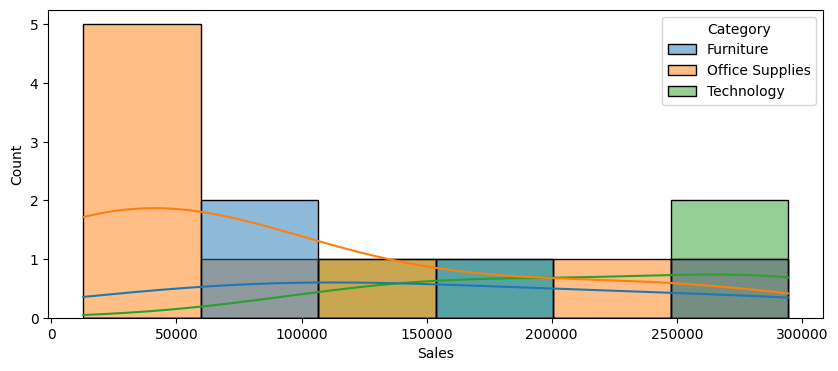

In [71]:
plt.figure(figsize=(10, 4))
sns.histplot(sales_sub_category, x="Sales", kde=True, hue="Category")
plt.show()

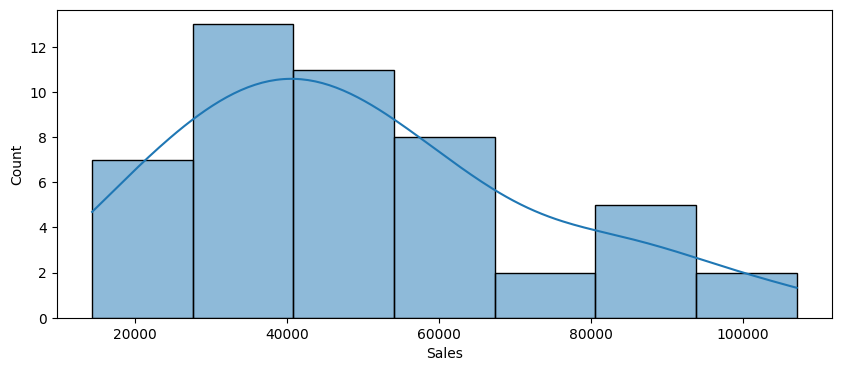

In [74]:
plt.figure(figsize=(10, 4))
sns.histplot(monthly_sales, x="Sales", kde=True)
plt.show()

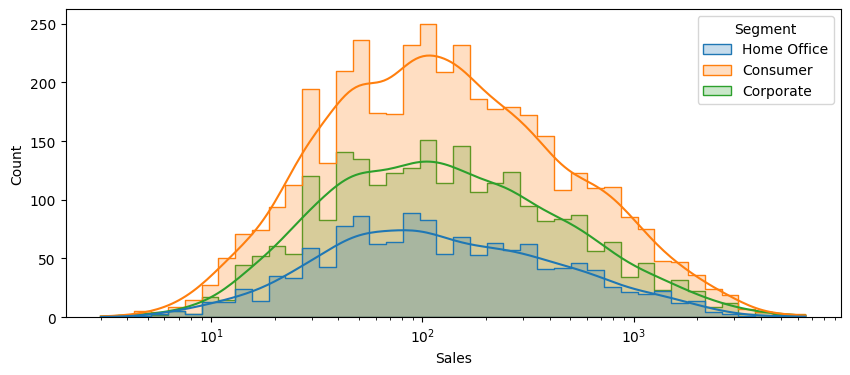

In [81]:
plt.figure(figsize=(10, 4))
sns.histplot(df, x="Sales", kde=True, log_scale=True, hue="Segment", element="step")
plt.show()

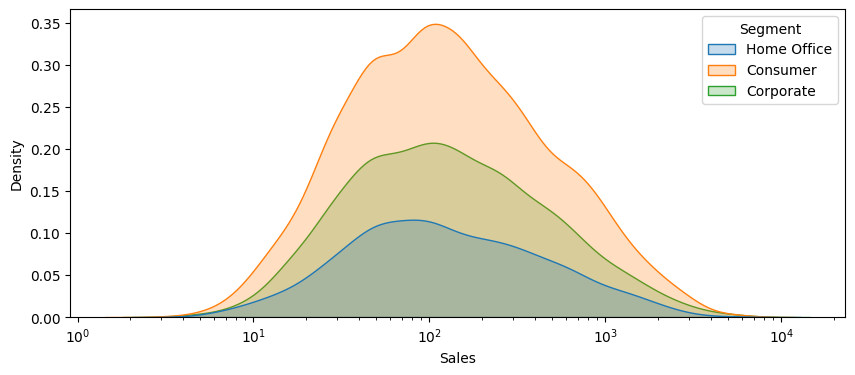

In [85]:
plt.figure(figsize=(10, 4))
sns.kdeplot(df, x="Sales", log_scale=True, hue="Segment", fill=True)
plt.show()

In [84]:
df.groupby("Segment")["Sales"].mean()

Segment
Consumer       296.186392
Corporate      293.610581
Home Office    275.248712
Name: Sales, dtype: float64

In [86]:
month_category_sales_profit

,Month,Category,Sales,Profit
0,1,Furniture,453.910448,24.298507
1,1,Office Supplies,181.301205,27.346386
2,1,Technology,647.373333,90.666667
3,2,Furniture,583.764706,42.852941
4,2,Office Supplies,151.199275,27.894928
5,2,Technology,469.533333,42.988889
6,3,Furniture,549.786885,-7.688525
7,3,Office Supplies,155.297806,28.178683
8,3,Technology,485.341463,53.780488
9,4,Furniture,534.315789,76.807018


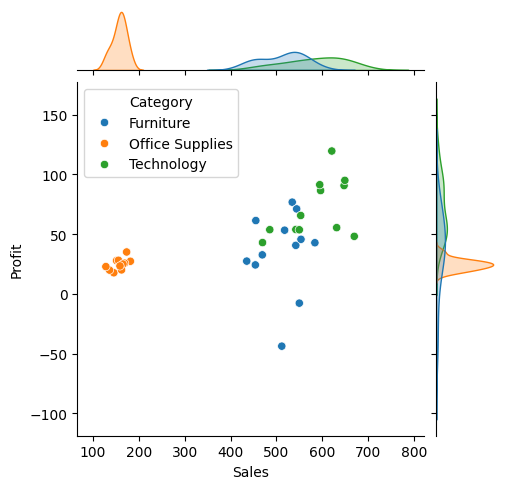

In [92]:
sns.jointplot(month_category_sales_profit, x="Sales", y="Profit", height=5, hue="Category")
plt.show()

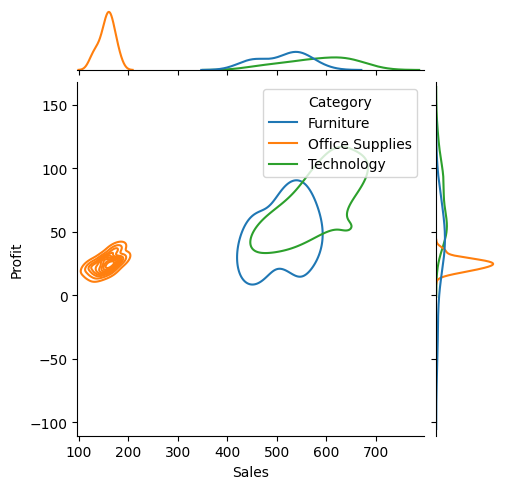

In [99]:
sns.jointplot(month_category_sales_profit, x="Sales", y="Profit", height=5, kind="kde", hue="Category")
plt.show()

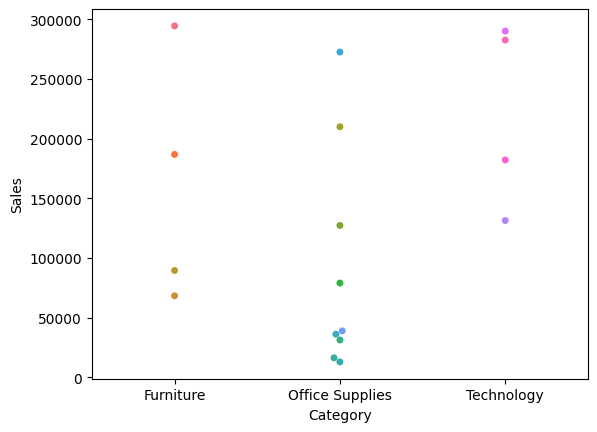

In [105]:
sns.swarmplot(sales_sub_category, y="Sales", x="Category", hue="Sub-Category", legend=False)
plt.show()

In [109]:
area_sales = df.groupby(["Region","Country", "State"])[["Sales", "Profit"]].sum().reset_index()

In [110]:
area_sales

,Region,Country,State,Sales,Profit
0,Central,Austria,Carinthia,10381,2832
1,Central,Austria,Salzburg,1357,461
2,Central,Austria,Styria,4441,1278
3,Central,Austria,Tyrol,6221,2064
4,Central,Austria,Upper Austria,5138,1490
...,...,...,...,...,...
123,South,Spain,Madrid,57207,13273
124,South,Spain,Melilla,145,33
125,South,Spain,Murcia,10558,1682
126,South,Spain,Navarra,4607,1169


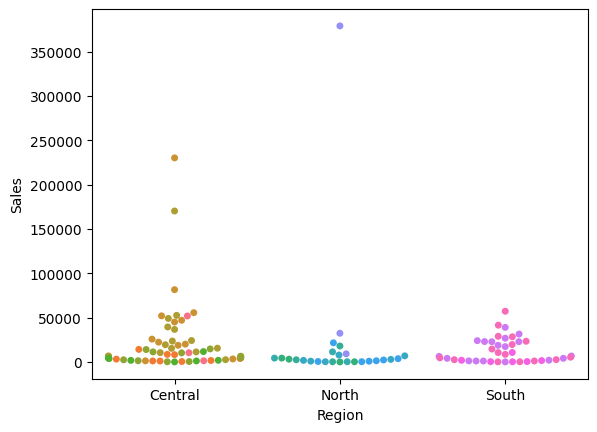

In [115]:
sns.swarmplot(area_sales, y="Sales", x="Region", hue="Country", legend=False)
plt.show()

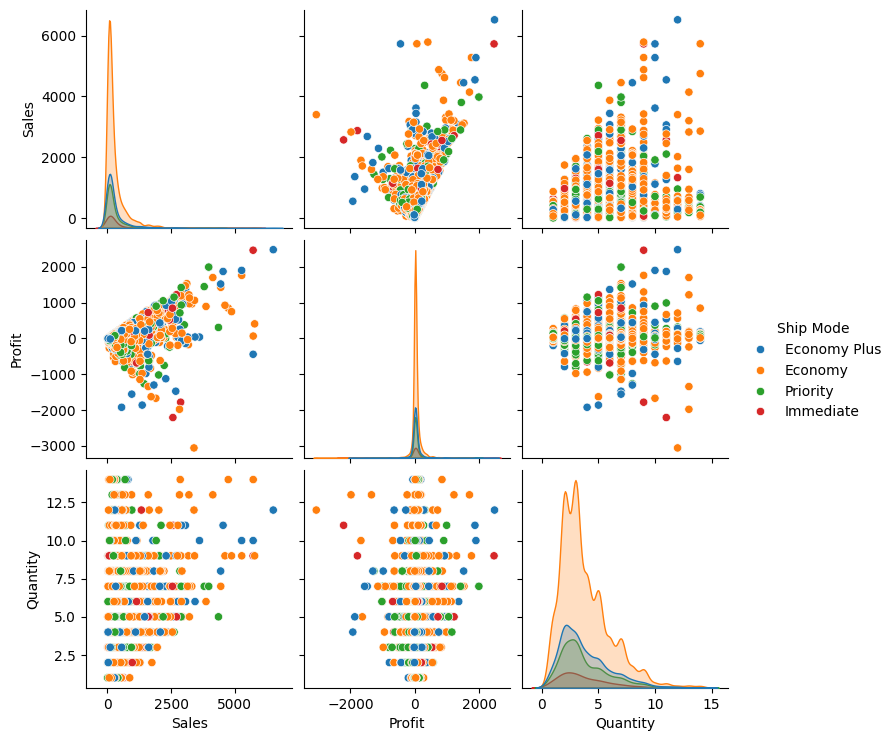

In [122]:
sns.pairplot(df[["Ship Mode","Sales", "Profit", "Quantity"]], hue="Ship Mode")
plt.show()